In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit and
# make a table containing R^2 value for each prepared model.

# *R&D Spend -- Research and devolop spend in the past few years
# *Administration -- spend on administration in the past few years
# *Marketing Spend -- spend on Marketing in the past few years
# *State -- states from which data is collected
# *Profit  -- profit of each state in the past few years


# Importing Dataset

In [3]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Descriptive analysis

In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Renaming 

In [7]:
data=data.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)

In [8]:
data

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# checking for missing values

In [9]:
data[data.values==0]

,RnD,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Visualizing missing values

<AxesSubplot:>

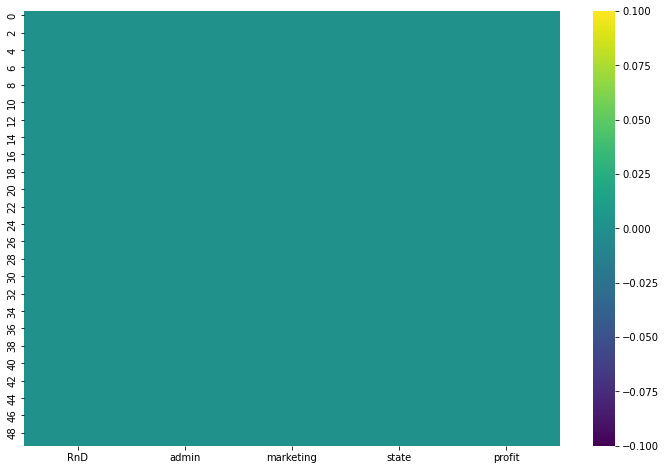

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')

# *Observation: no missing values present in the data set

# Checking for duplicates

In [11]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

# *Observation:no duplicated values in the data set

<AxesSubplot:>

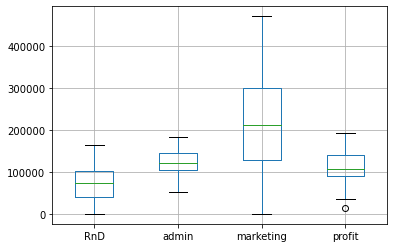

In [12]:
data.boxplot()

# *Observation:there is outlier in profit , but no outliers in features

{'whiskers': [<matplotlib.lines.Line2D at 0x28e5935dd60>,
 'caps': [<matplotlib.lines.Line2D at 0x28e5934c3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28e5935d9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28e5934cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e5934ce50>],
 'means': []}

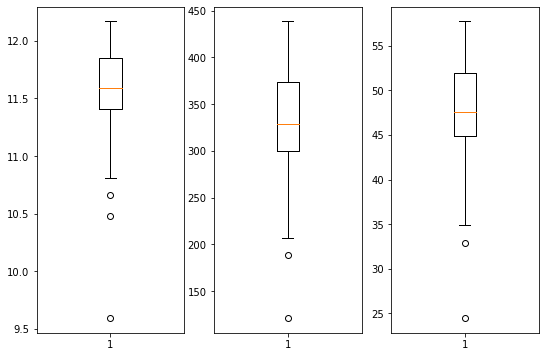

In [13]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(data['profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(data['profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(data['profit']))

# building model

In [15]:
raw_model = sm.ols("profit~RnD+admin+marketing", data = data).fit()

In [16]:
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        17:21:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
data.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


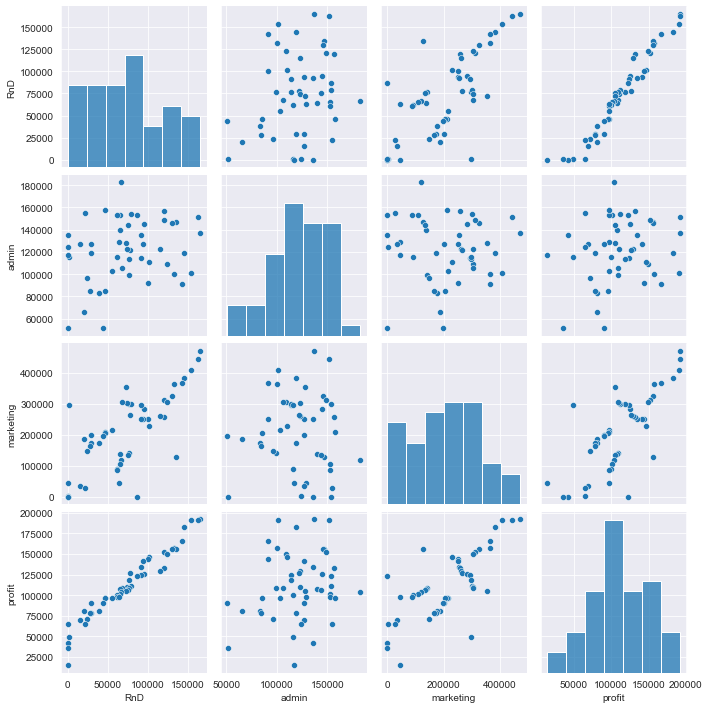

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# SLR

In [20]:
ml_R=sm.ols('profit~RnD',data = data).fit()  
#t and p-Values
print(ml_R.tvalues, '\n', ml_R.pvalues)  
ml_R.summary()

Intercept    19.320288
RnD          29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD          3.500322e-32
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           3.50e-32
Time:                        17:22:15   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
ml_a=sm.ols('profit~admin',data = data).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  
ml_a.summary()

Intercept    3.040044
admin        1.419493
dtype: float64 
 Intercept    0.003824
admin        0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 07 Nov 2022   Prob (F-statistic):              0.162
Time:                        17:22:22   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ml_m=sm.ols('profit~marketing',data = data).fit()  
#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)  
ml_m.summary()

Intercept    7.808356
marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
marketing    4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.38e-10
Time:                        17:22:30   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [23]:
rsq_RnD = sm.ols('RnD~admin+marketing',data=data).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD) 

rsq_ad = sm.ols('admin~RnD+marketing',data=data).fit().rsquared  
vif_ad = 1/(1-rsq_ad) 

rsq_mar = sm.ols('marketing~RnD+admin',data=data).fit().rsquared  
vif_mar = 1/(1-rsq_mar) 


# Storing vif values in a data frame
d1 = {'Variables':['RnD','admin','marketing'],'VIF':[vif_RnD,vif_ad,vif_mar]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD,2.468903
1,admin,1.175091
2,marketing,2.326773


In [24]:
raw_model.resid.min()

-33533.73411129865

In [25]:
raw_model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

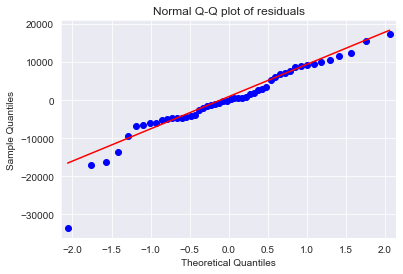

In [26]:
import statsmodels.api as smf
qqplot=smf.qqplot(raw_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(raw_model.resid<-30000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

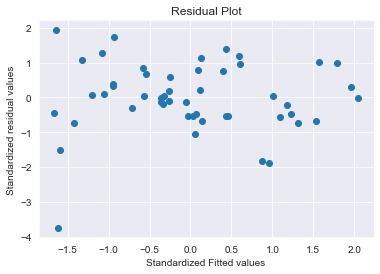

In [29]:
plt.scatter(get_standardized_values(raw_model.fittedvalues),
            get_standardized_values(raw_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals vs Regressors

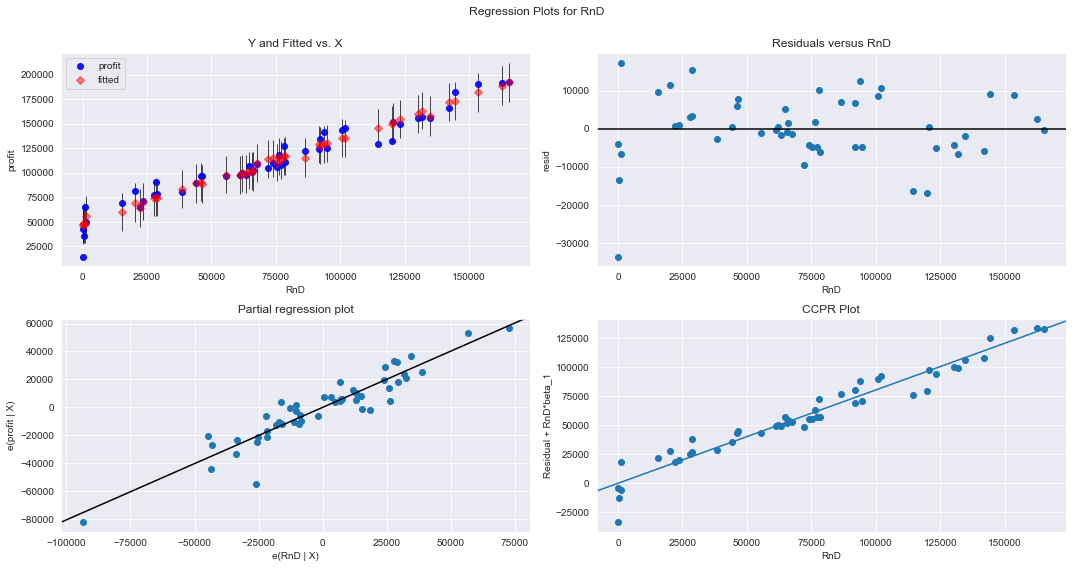

In [30]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(raw_model, "RnD", fig=fig)
plt.show()

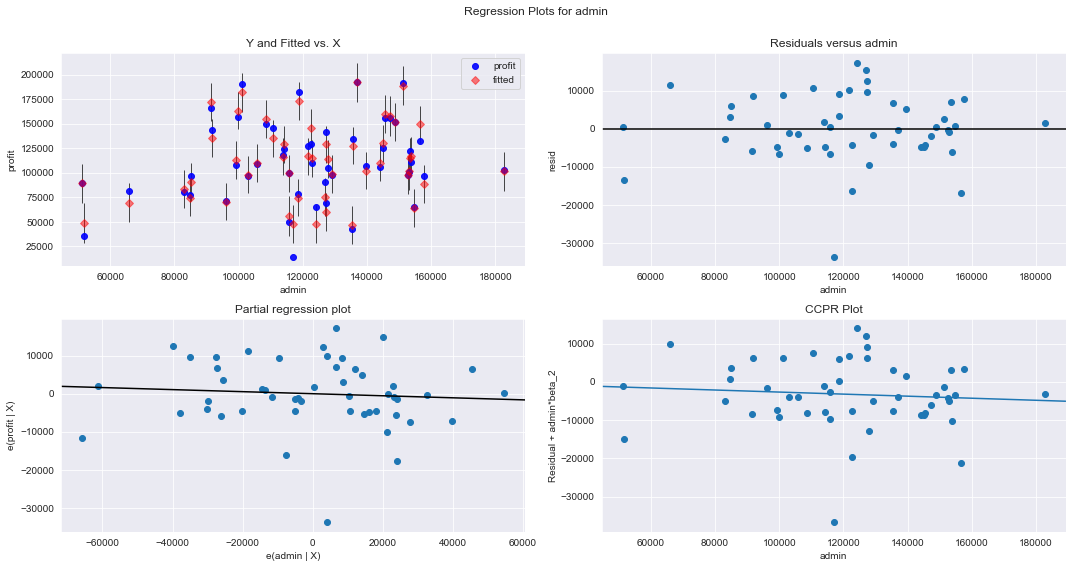

In [31]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(raw_model, "admin", fig=fig)
plt.show()

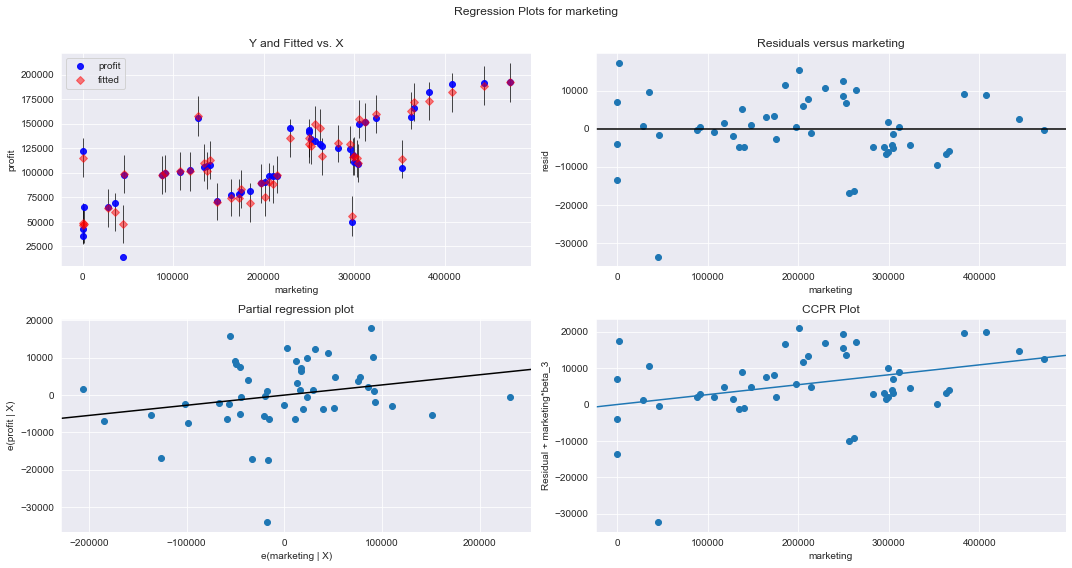

In [32]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(raw_model, "marketing", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Dececting Influencers/Outliers

# Cook's Distance

In [33]:
model_influence = raw_model.get_influence()
(c, _) = model_influence.cooks_distance

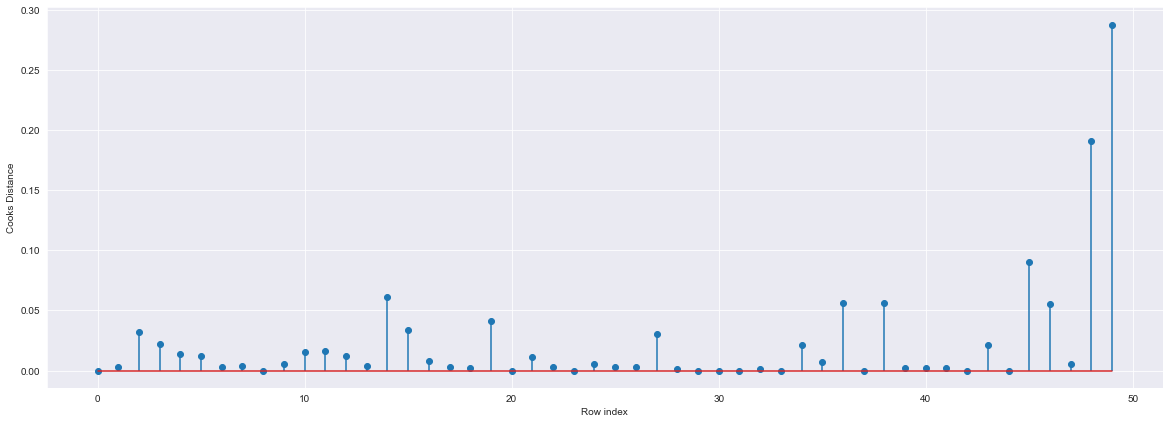

In [34]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

# high Influence points

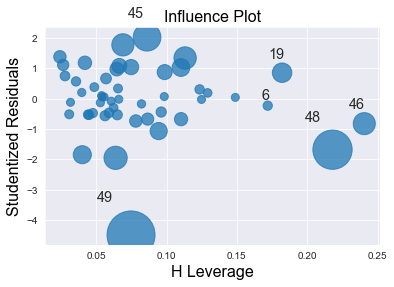

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(raw_model)
plt.show()

In [37]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [38]:
data[data.index.isin([49])]

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [39]:
data.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [40]:
#Load the data
data_new = pd.read_csv("50_Startups.csv")

In [41]:
data1=data_new.drop(data_new.index[[49]],axis=0).reset_index()
data1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [43]:
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
data1=data1.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)

In [45]:
data1

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
model2=sm.ols("profit~RnD+admin+marketing",data = data1).fit()

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           8.85e-32
Time:                        17:24:41   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
model_influence_V = model2.get_influence()
(c_V, _) = model_influence_V.cooks_distance

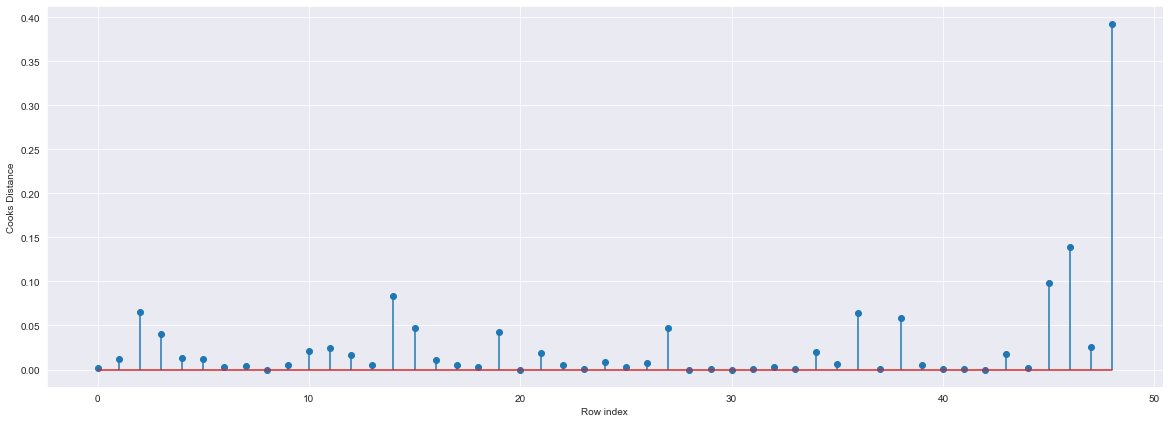

In [57]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c_V, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
(np.argmax(c_V),np.max(c_V))

(48, 0.39274420556321127)

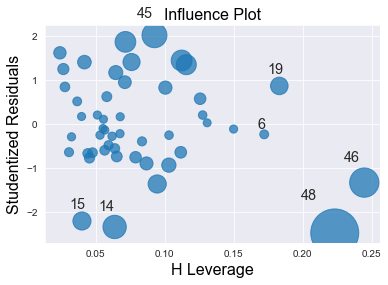

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [60]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36734693877551017

# Observation:no high influence

# predicting 

In [62]:
predicted = pd.DataFrame()
predicted['RnD'] = data1.RnD
predicted['marketing'] = data1.marketing
predicted['admin'] = data1.admin
predicted['Profit'] = data1.profit
predicted['Predicted_Profit'] = pd.DataFrame(model2.predict(predicted[['RnD','marketing','admin']]))
predicted

,RnD,marketing,admin,Profit,Predicted_Profit
0,165349.20,471784.10,136897.80,192261.83,190716.676999
1,162597.70,443898.53,151377.59,191792.06,187537.122227
2,153441.51,407934.54,101145.55,191050.39,180575.526396
3,144372.41,383199.62,118671.85,182901.99,172461.144642
4,142107.34,366168.42,91391.77,166187.94,170863.486721
5,131876.90,362861.36,99814.71,156991.12,162582.583177
6,134615.46,127716.82,147198.87,156122.51,157741.338633
7,130298.13,323876.68,145530.06,155752.60,159347.735318
8,120542.52,311613.29,148718.95,152211.77,151328.826941
9,123334.88,304981.62,108679.17,149759.96,154236.846778


# Table containing R^2 value for each prepared model

In [63]:
models={'Different_Models':['raw_model','model2'],
        'R_squared':[raw_model.rsquared,model2.rsquared],
        'R_squared_adjusted':[raw_model.rsquared_adj,model2.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(model2.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,raw_model,0.950746,0.947534,9232.334837
1,model2,0.961316,0.958737,7753.807752
